### Importação dos dados .mat

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from scipy.io import loadmat
train = loadmat('./Dados/dados_treinamento.mat')
val = loadmat('./Dados/dados_val.mat')
test = loadmat('./Dados/dados_teste.mat')

In [3]:
trainX = train['X']
trainY = train['y']
valX = val['Xval']
valY = val['yval']
testX = test['Xt']
testY = test['yt']

print ("trainX shape:\t ", trainX.shape)
print ("trainY shape:\t ", trainY.shape)
print ("valX shape:\t ", valX.shape)
print ("valY shape:\t ", valY.shape)
print ("testX shape:\t ", testX.shape)
print ("testY shape:\t ", testY.shape)

trainX shape:	  (1000, 2)
trainY shape:	  (1000, 1)
valX shape:	  (1000, 2)
valY shape:	  (1000, 1)
testX shape:	  (1000, 2)
testY shape:	  (1000, 1)


### Visualização do dataset

In [4]:
# dataset treino
train_df = pd.DataFrame(columns = ['x0', 'x1', 'y'])
train_df['x0'] = trainX[:,0]
train_df['x1'] = trainX[:,1]
train_df['y'] = trainY

# dataset validação
val_df = pd.DataFrame(columns = ['x0', 'x1', 'y'])
val_df['x0'] = valX[:,0]
val_df['x1'] = valX[:,1]
val_df['y'] = valY

# dataset teste
test_df = pd.DataFrame(columns = ['x0', 'x1', 'y'])
test_df['x0'] = testX[:,0]
test_df['x1'] = testX[:,1]
test_df['y'] = testY

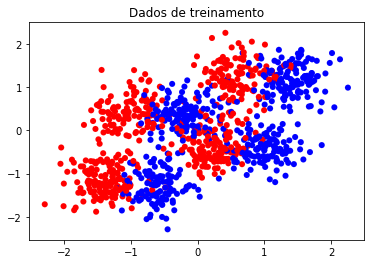

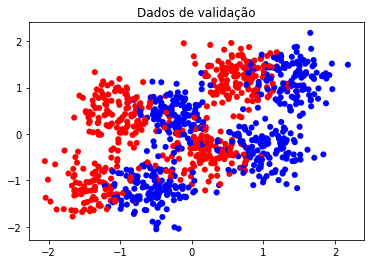

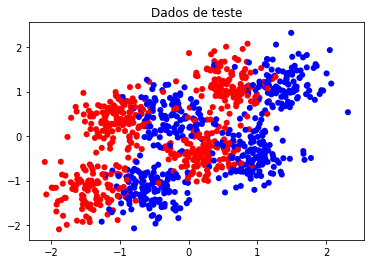

In [5]:
# treino
fig, ax = plt.subplots()
colors = {1 : 'blue', -1 : 'red'}
ax.scatter(train_df['x0'], train_df['x1'], c = train_df['y'].apply(lambda x: colors[x]), linewidth = 0.05)
plt.title("Dados de treinamento")
plt.show()

# validação
fig, ax = plt.subplots()
colors = {1 : 'blue', -1 : 'red'}
ax.scatter(val_df['x0'], val_df['x1'], c = val_df['y'].apply(lambda x: colors[x]), linewidth = 0.05)
plt.title("Dados de validação")
plt.show()

# teste
fig, ax = plt.subplots()
colors = {1 : 'blue', -1 : 'red'}
ax.scatter(test_df['x0'], test_df['x1'], c = test_df['y'].apply(lambda x: colors[x]), linewidth = 0.05)
plt.title("Dados de teste")
plt.show()

### Treinamento do modelo SVM (support vector machine) para Kernel linear

In [6]:
#Import svm model
from sklearn import svm

_kernel =  'linear' # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
_tol = 1e-6

#Create a svm Classifier
classifier = svm.SVC(kernel = _kernel, tol = _tol)

#Train the model using the training sets
classifier.fit(trainX, trainY.ravel())

#Predict the response for test dataset
ŷ = classifier.predict(testX)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(ŷ, testY)

#Printing cm
print("confusion matrix :\n", (cm))
#Printing accuracy
print("accuracy: ", 100*(cm.trace())/(cm.sum()))

confusion matrix :
 [[331 166]
 [168 335]]
accuracy:  66.6


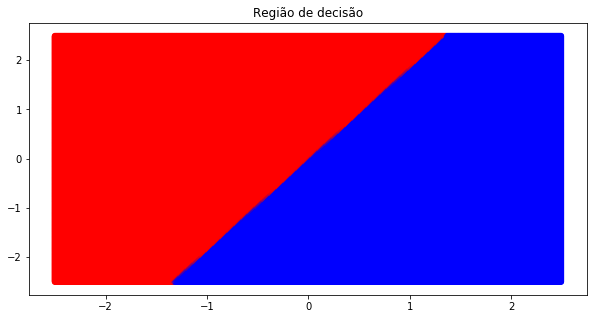

In [7]:
# gera todos pontos para serem avaliados pelo modelo
x0 = []
x1 = []
predicted = []
for i in np.arange(-2.5, 2.5, 0.01):
    for j in np.arange(-2.5, 2.5, 0.01):
        x0.append(i)
        x1.append(j)
        value = np.array([[i],[j]])
        y_pred = classifier.predict(value.T)
        predicted.append(y_pred)

# plot da região de decisão
fig, ax = plt.subplots(figsize = (10, 5))
colors = []
for value in predicted:
    if value == 1:
        colors.append('blue')
    else:
        colors.append('red')
        
ax.scatter(x0, x1, c = colors, linewidth = 0.05)
plt.title("Região de decisão")
plt.show()

### Treinamento do modelo SVM (support vector machine) para Kernel polinomial de ordem 3


In [8]:
#Import svm model
from sklearn import svm

_kernel =  'poly' # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
_degree =  3 # degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
_gamma = 'auto'
_tol = 1e-6

#Create a svm Classifier
classifier = svm.SVC(kernel = _kernel, degree = _degree, gamma = _gamma, tol = _tol)

#Train the model using the training sets
classifier.fit(trainX, trainY.ravel())

#Predict the response for test dataset
ŷ = classifier.predict(testX)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(ŷ, testY)

#Printing cm
print("confusion matrix :\n", (cm))
#Printing accuracy
print("accuracy: ", 100*(cm.trace())/(cm.sum()))

confusion matrix :
 [[408 159]
 [ 91 342]]
accuracy:  75.0


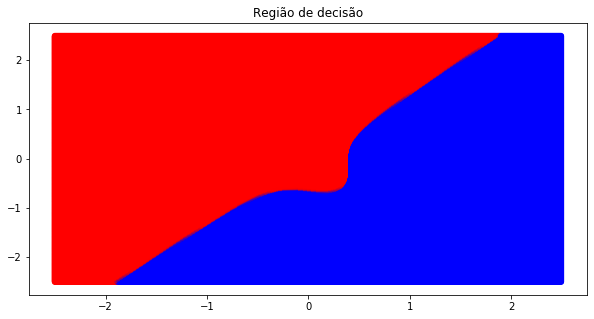

In [9]:
# gera todos pontos para serem avaliados pelo modelo
x0 = []
x1 = []
predicted = []
for i in np.arange(-2.5, 2.5, 0.01):
    for j in np.arange(-2.5, 2.5, 0.01):
        x0.append(i)
        x1.append(j)
        value = np.array([[i],[j]])
        y_pred = classifier.predict(value.T)
        predicted.append(y_pred)

# plot da região de decisão
fig, ax = plt.subplots(figsize = (10, 5))
colors = []
for value in predicted:
    if value == 1:
        colors.append('blue')
    else:
        colors.append('red')
        
ax.scatter(x0, x1, c = colors, linewidth = 0.05)
plt.title("Região de decisão")
plt.show()

### Treinamento do modelo SVM (support vector machine) para Radial Bass Function

In [10]:
#Import svm model
from sklearn import svm

_kernel =  'rbf' # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
_gamma = 0.35
_tol = 1e-6

#Create a svm Classifier
classifier = svm.SVC(kernel = _kernel, gamma = _gamma, tol = _tol)

#Train the model using the training sets
classifier.fit(trainX, trainY.ravel())

#Predict the response for test dataset
ŷ = classifier.predict(testX)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(ŷ, testY)

#Printing cm
print("confusion matrix (test):\n", (cm))
#Printing accuracy
print("accuracy (test): ", 100*(cm.trace())/(cm.sum()))

#Comparing the predictions against the actual observations in y_val
ŷ = classifier.predict(valX)
cm = confusion_matrix(ŷ, valY)

#Printing cm
print("confusion matrix (validation):\n", (cm))
#Printing accuracy
print("accuracy (validation): ", 100*(cm.trace())/(cm.sum()))

confusion matrix (test):
 [[449  98]
 [ 50 403]]
accuracy (test):  85.2
confusion matrix (validation):
 [[413  99]
 [ 68 420]]
accuracy (validation):  83.3


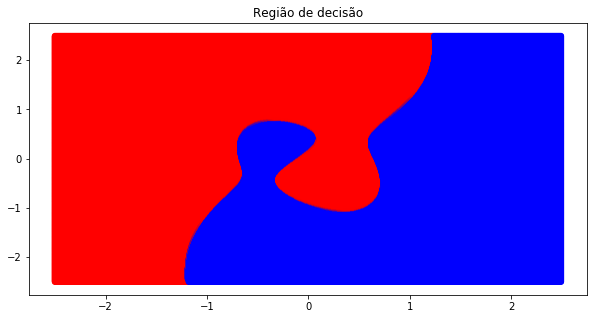

In [11]:
# gera todos pontos para serem avaliados pelo modelo
x0 = []
x1 = []
predicted = []
for i in np.arange(-2.5, 2.5, 0.01):
    for j in np.arange(-2.5, 2.5, 0.01):
        x0.append(i)
        x1.append(j)
        value = np.array([[i],[j]])
        y_pred = classifier.predict(value.T)
        predicted.append(y_pred)

# plot da região de decisão
fig, ax = plt.subplots(figsize = (10, 5))
colors = []
for value in predicted:
    if value == 1:
        colors.append('blue')
    else:
        colors.append('red')
        
ax.scatter(x0, x1, c = colors, linewidth = 0.05)
plt.title("Região de decisão")
plt.show()

### Treinamento do modelo SVM (support vector machine) para Radial Bass Function para um alto valor de Gamma

In [12]:
#Import svm model
from sklearn import svm

_kernel =  'rbf' # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
_gamma = 0.9
_tol = 1e-6

#Create a svm Classifier
classifier = svm.SVC(kernel = _kernel, gamma = _gamma, tol = _tol)

#Train the model using the training sets
classifier.fit(trainX, trainY.ravel())

#Predict the response for test dataset
ŷ = classifier.predict(testX)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(ŷ, testY)

#Printing cm
print("confusion matrix (test):\n", (cm))
#Printing accuracy
print("accuracy (test): ", 100*(cm.trace())/(cm.sum()))

#Comparing the predictions against the actual observations in y_val
ŷ = classifier.predict(valX)
cm = confusion_matrix(ŷ, valY)

#Printing cm
print("confusion matrix (validation):\n", (cm))
#Printing accuracy
print("accuracy (validation): ", 100*(cm.trace())/(cm.sum()))

confusion matrix (test):
 [[443  63]
 [ 56 438]]
accuracy (test):  88.1
confusion matrix (validation):
 [[415  72]
 [ 66 447]]
accuracy (validation):  86.2


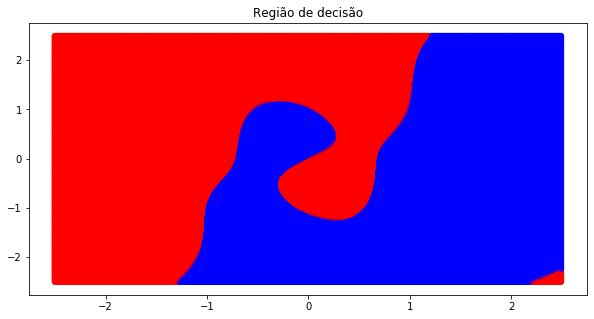

In [13]:
# gera todos pontos para serem avaliados pelo modelo
x0 = []
x1 = []
predicted = []
for i in np.arange(-2.5, 2.5, 0.01):
    for j in np.arange(-2.5, 2.5, 0.01):
        x0.append(i)
        x1.append(j)
        value = np.array([[i],[j]])
        y_pred = classifier.predict(value.T)
        predicted.append(y_pred)

# plot da região de decisão
fig, ax = plt.subplots(figsize = (10, 5))
colors = []
for value in predicted:
    if value == 1:
        colors.append('blue')
    else:
        colors.append('red')
        
ax.scatter(x0, x1, c = colors, linewidth = 0.05)
plt.title("Região de decisão")
plt.show()

### Treinamento do modelo SVM (support vector machine) para Kernel sigmoid

In [14]:
#Import svm model
from sklearn import svm

_kernel =  'rbf' # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
_gamma = 'auto'
_tol = 1e-6

#Create a svm Classifier
classifier = svm.SVC(kernel = _kernel, gamma = _gamma, tol = _tol)

#Train the model using the training sets
classifier.fit(trainX, trainY.ravel())

#Predict the response for test dataset
ŷ = classifier.predict(testX)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(ŷ, testY)

#Printing cm
print("confusion matrix (test):\n", (cm))
#Printing accuracy
print("accuracy (test): ", 100*(cm.trace())/(cm.sum()))

#Comparing the predictions against the actual observations in y_val
ŷ = classifier.predict(valX)
cm = confusion_matrix(ŷ, valY)

#Printing cm
print("confusion matrix (validation):\n", (cm))
#Printing accuracy
print("accuracy (validation): ", 100*(cm.trace())/(cm.sum()))

confusion matrix (test):
 [[434  70]
 [ 65 431]]
accuracy (test):  86.5
confusion matrix (validation):
 [[403  76]
 [ 78 443]]
accuracy (validation):  84.6


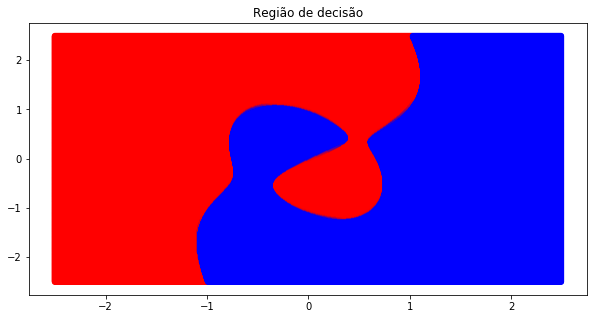

In [15]:
# gera todos pontos para serem avaliados pelo modelo
x0 = []
x1 = []
predicted = []
for i in np.arange(-2.5, 2.5, 0.01):
    for j in np.arange(-2.5, 2.5, 0.01):
        x0.append(i)
        x1.append(j)
        value = np.array([[i],[j]])
        y_pred = classifier.predict(value.T)
        predicted.append(y_pred)

# plot da região de decisão
fig, ax = plt.subplots(figsize = (10, 5))
colors = []
for value in predicted:
    if value == 1:
        colors.append('blue')
    else:
        colors.append('red')
        
ax.scatter(x0, x1, c = colors, linewidth = 0.05)
plt.title("Região de decisão")
plt.show()

### Treinamento do modelo SVM (support vector machine) para Kernel sigmoid para um alto valor de gamma

In [16]:
#Import svm model
from sklearn import svm

_kernel =  'rbf' # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
_gamma = 0.9
_tol = 1e-6

#Create a svm Classifier
classifier = svm.SVC(kernel = _kernel, gamma = _gamma, tol = _tol)

#Train the model using the training sets
classifier.fit(trainX, trainY.ravel())

#Predict the response for test dataset
ŷ = classifier.predict(testX)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(ŷ, testY)

#Printing cm
print("confusion matrix (test):\n", (cm))
#Printing accuracy
print("accuracy (test): ", 100*(cm.trace())/(cm.sum()))

#Comparing the predictions against the actual observations in y_val
ŷ = classifier.predict(valX)
cm = confusion_matrix(ŷ, valY)

#Printing cm
print("confusion matrix (validation):\n", (cm))
#Printing accuracy
print("accuracy (validation): ", 100*(cm.trace())/(cm.sum()))

confusion matrix (test):
 [[443  63]
 [ 56 438]]
accuracy (test):  88.1
confusion matrix (validation):
 [[415  72]
 [ 66 447]]
accuracy (validation):  86.2


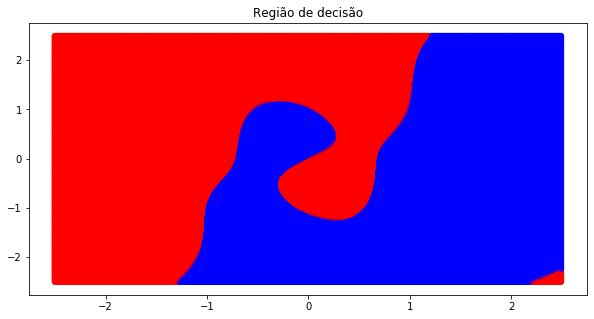

In [17]:
# gera todos pontos para serem avaliados pelo modelo
x0 = []
x1 = []
predicted = []
for i in np.arange(-2.5, 2.5, 0.01):
    for j in np.arange(-2.5, 2.5, 0.01):
        x0.append(i)
        x1.append(j)
        value = np.array([[i],[j]])
        y_pred = classifier.predict(value.T)
        predicted.append(y_pred)

# plot da região de decisão
fig, ax = plt.subplots(figsize = (10, 5))
colors = []
for value in predicted:
    if value == 1:
        colors.append('blue')
    else:
        colors.append('red')
        
ax.scatter(x0, x1, c = colors, linewidth = 0.05)
plt.title("Região de decisão")
plt.show()

### Comentários sobre os Kernels
- como esperado um __Kernel linear__ não é satisfatório para o problema. Pela visualização do dataset é nítido que dificilmente um algoritmo separará linearmente o conjunto de dados
- já para um __Kernel polinomial__ de ordem ímpar o classificador já supera drasticamente o Kernel linear com acurácia em cerca de 75%. Para polinômios de ordem par o classificador é inferior. Apesar uma relativa acurácia, a curva de decisão é bastante pobre ao que se é esperado
- já para __Kernels sigmoid e Radial Bass Function__ o classificador obteve as melhores acurácias (em torno de 90%). Segundo a literatura, estes Kernels tem poder de levar o conjunto de dados a uma dimensão infinita, mas com ressalvas quanto ao overfitting. O parâmetro gamma é um regulador de overfitting, surpreendentemente, mesmo para altos valores de gama o classificador continuou melhorando sua acurácia para o conjunto de testes e validação, mesmo sempre o treinando com o conjunto de treinamento. Isto nos dá uma direção de que o conjunto de teste é muito similar ao conjunto de treinamento, ou que o dataset é pobre em quesito de quantidade de amostras. __Entretanto__, como pode se ver na diagonal inferior direita da figura acima, vemos que o classificador já se demonstra "viciado" aos dados de treino, isto aconteceu porque eu forcei a entrada de um dado totalmente desconhecido ao sistema (x1, x2) = (2.5, -2.5), neste sentido, isso confirma que para entrada de dados extremamente diferentes das amostras de treino o classificador se comportaria pior